Instructions: each piece of instruction is contained in a cell below. 

**PREFERRED DELIVERY METHOD**
Fork this github repository on your own github, make that repository private and make fedhere a collaborator. Upload your solution to this repository. 

**OTHERWISE**
If you are not familiar with github and you cannot figure out how to follow the instructions above you can email the solution.

Fill in each cell below each piece of instruction. This is not a close-book test: feel free to use any resources (google, stackoverflow, books) that you want! 

If you cannot complete a task feel free to ask for the solution for that portion of the exercise. There are multiple aspects we will evaluate you on and it is expected that you will be  stronger on some tasks than on others. We will use this information to best fit you in our CA assignments. For example, if you cannot read in the data as we are asking, you can as for a clean dataset so that you can show you can do the modeling part. If you are in this situation send us an email. 

Try to write clean, readable code. This will also be a parameter of evaluation.

import relevant packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.linear_model import LinearRegression

** Data acquisition and cleaning **

In [3]:
def isfloat(value): # Helper function to filter dirty item
  try:
    float(value)
    return True
  except ValueError:
    return False

def addLabel(series): # Append another column with corresponding label 
    output = []
    for item in series:
        if item == 'yellow':
            output.append(1)
        else:
            output.append(0)
    return output

def loadData(inputFile): # Function to load data to required format
    data_file = pd.read_csv(inputFile, names = ['x1', 'x2', 'color'])
    data_file.set_index('x2')
    filter2 = data_file.applymap(lambda x: isfloat(x) == True)
    data_file = data_file[filter2['x2'] == True]
    data_file['x2'] = data_file.x2.astype(float)
    data_file['y'] = addLabel(data_file['color'])
    data_file['y'] = data_file.y.astype(float)
    return data_file

datain = loadData("logreg.csv")

Read in the data file called logreg2. Call the columns x1, x2, color, and y (y should be the numerical conversion of color). Convert each column to a floating point variable mapping the last column to 0s and 1s according to the value. Drop poorly inputed data. At the end of the process the data should look like this:

In [4]:
datain.head()

,x1,x2,color,y
0,1.103418,5.160703,green,0.0
1,0.754804,5.846008,green,0.0
2,-1.651331,7.416112,green,0.0
3,-2.502233,7.799007,green,0.0
4,-0.183246,9.076321,green,0.0


In [5]:
datain.describe()

,x1,x2,y
count,196.000000,196.000000,196.000000
mean,3.221567,4.282077,0.448980
std,3.519541,3.409446,0.498664
min,-4.841950,-3.133742,0.000000
25%,0.617336,1.696219,0.000000
50%,3.071503,4.270623,0.000000
75%,5.738187,7.095339,1.000000
max,13.162562,12.174896,1.000000


** Displaying data **

Plot the data on the x1-x2 plane using the categorical variable as color; make sure that the axes labels are readable and that the axes are on the same scale. 
use the third column as a color category.

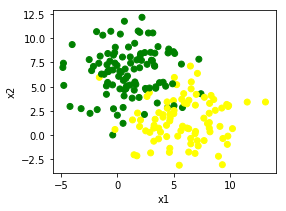

In [6]:
plt.subplots(figsize=(4, 3))
plt.scatter(datain.x1, datain.x2, c = datain.color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

** Modeling **

Now that your data is read in properly,
Initiate a logistic regression object with the x1, x2, and y variables for modeling, setting C = 10,000 to disable regularization

In [7]:
# Initialize classifier 
logreg = LogisticRegression(C = 10000)
X = datain[['x1','x2']]

# Split the data set
y = datain['y']
total = X.shape[0]
portionTraining = 0.7 # The portion of training set to the total data set
train_total = int(total * portionTraining)
X_train = X[0:train_total]
X_test = X[train_total:total]
y_train = y[0:train_total]
y_test = y[train_total:total]

Run logistic regression on the training set

In [8]:
classifier = logreg.fit(X_train,y_train.ravel())

Print out the fitted parameters (including the intercept)

In [9]:
#parameters = classifier.get_params()
print("The trained parameters are: ")
print("coefficients: " + str(classifier.coef_) + " intercept: " + str(float(classifier.intercept_)))

The trained parameters are: 
coefficients: [[ 0.69861594 -0.77858791]] intercept: 0.1632967832016515


Use these parameters to predict on the test set

In [10]:
pred = classifier.predict(X_test)

** Displaying and interpreting the result **

Draw two plots, first one showing your prediction, second one for the actual labels, with decision boundary in both

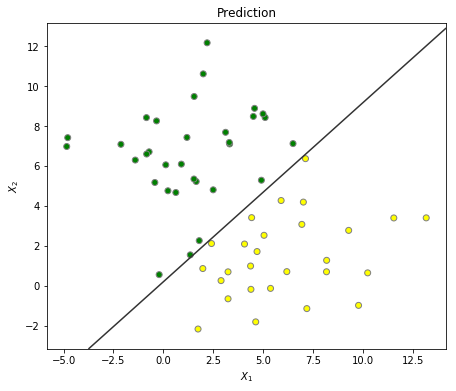

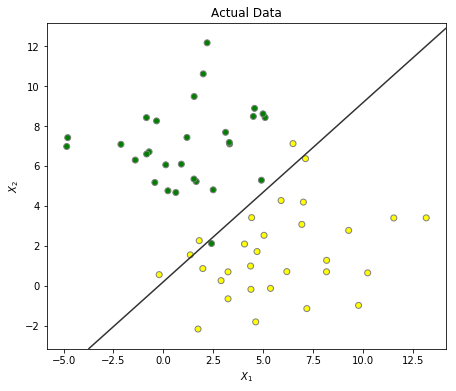

In [11]:
def redeemColor(input):
    output = []
    for i in range(input.shape[0]):
        if input[i] == 1:
            output.append("yellow")
        else:
            output.append("green")
    return output

# Plot for prediction
X_array = np.asarray(X_test).reshape((X_test.shape[0], X_test.shape[1]))
X_array_color = datain['color']
color_array = X_array_color[train_total:total]
predict_array = redeemColor(pred)
x1_min, x1_max = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
x2_min, x2_max = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 25),
                     np.linspace(x2_min, x2_max, 25))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 0].reshape(xx.shape)
_, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(X_array[:,0], X_array[:,1], c = predict_array, vmin=-.2, vmax=1.2,
           edgecolor="grey", linewidth=1)
ax.set(aspect="equal",
       xlim=(x1_min, x1_max), ylim=(x2_min, x2_max),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title("Prediction")
plt.show()

# Plot for actual data
_, ax1 = plt.subplots(figsize=(8, 6))
ax1.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
ax1.scatter(X_array[:,0], X_array[:,1], c = color_array, vmin=-.2, vmax=1.2,
           edgecolor="grey", linewidth=1)
ax1.set(aspect="equal",
       xlim=(x1_min, x1_max), ylim=(x2_min, x2_max),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title("Actual Data")
plt.show()

Calculate and display visually the confusion matrix to evaluate the model's performance, print out accuracy, recall and precision. Comment on your result

In [16]:
# Print accuracy and confusion matrix
confusion = confusion_matrix(y_test, pred)
accuracy = classifier.score(X_test, y_test)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("The confusion matrix is:")
print(confusion)
print("The precision is: " + str(precision) + " the recall is " + str(recall))
print("\nThe accuracy of the classifier is: " + str(accuracy))

The confusion matrix is:
[[28  1]
 [ 4 26]]
The precision is: 0.962962962963 the recall is 0.866666666667

The accuracy of the classifier is: 0.915254237288


Run a linear regression on the data and comment on which model is "best" and why.

In [33]:
# Linear Regression Model
linearClassifier = LinearRegression().fit(X_train, y_train.ravel())
accuracy_linear = linearClassifier.score(X_test, y_test)
print("The accuracy of linear regression is: " + str(accuracy_linear))

The accuracy of linear regression is: 0.692856938617


In [ ]:
# Comments of the performance on these two models 
# I do not know why we are required to use linear regression since this problem is a typical binary classification
# problem. But judge by the accuracy, the logistic regression has better performance. Maybe the other choice is to use 
# the support vector machine if more data can be provided.